In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from statsmodels.datasets import get_rdataset


In [3]:

# Load the dataset
data = get_rdataset("AirPassengers", "datasets")
df = data.data



In [5]:
df.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [7]:
# Convert the dataset to a pandas DataFrame and set the index to the date
df['Date'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')
df.set_index('Date', inplace=True)



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7300\950591139.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Date'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')


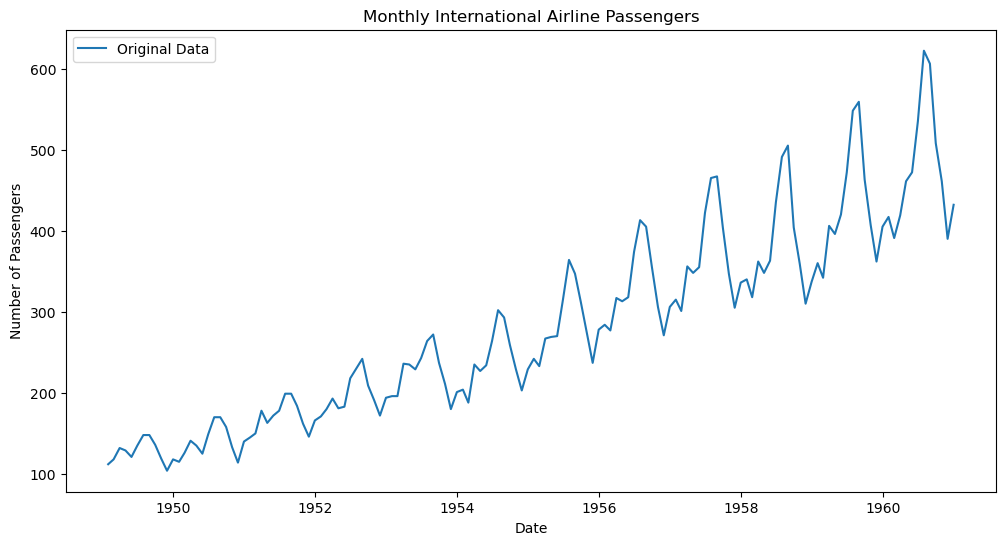

In [9]:
# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original Data')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()



C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7300\3244287101.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), forecast, label='Forecast', color='red')


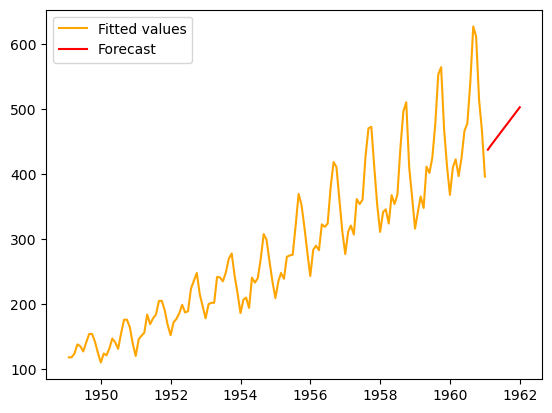

In [11]:
# Apply Holt's Linear Trend Model
holt_model = Holt(df['value']).fit()
forecast = holt_model.forecast(steps=12)  # Forecast the next 12 months

# Plot the forecasted data
plt.plot(df['value'].index, holt_model.fittedvalues, label='Fitted values', color='orange')
plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.legend()
plt.show()
